In [3]:
from visualize import chicago_visualization
modelname = '5smooth_coef'
prettysumdf_filename = "stan_output/{}.csv".format(modelname)
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
prettysumdf = pd.read_csv(prettysumdf_filename)
centolambda = prettysumdf[prettysumdf.name.str.contains('census_tract')][['name', '50%']]
centolambda.loc[:,'census_tract'] = centolambda.loc[:,'name'].str.replace("census_tract",'').str.strip('[]')
centolambda = centolambda.rename(columns = {'50%': 'census_tract_coefficient'})
centolambda = centolambda.drop(columns = ['name'])
centolambda.describe()

,census_tract_coefficient
count,2235.000000
mean,0.000931
std,0.260970
min,-1.254330
25%,-0.152855
50%,-0.003975
75%,0.146155
max,1.332060


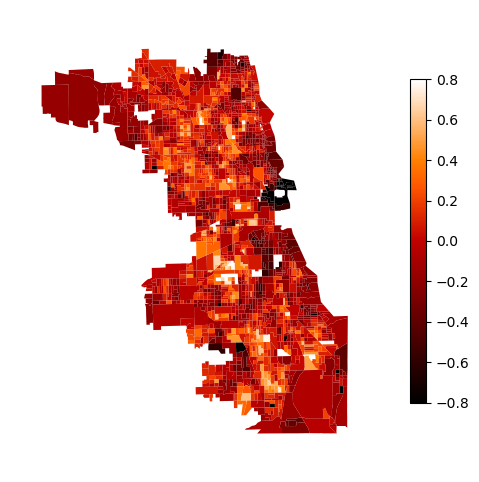

In [5]:

# chicago_visualization.plot_map_of_colors(new_ctl, tract_col="census_tract",hue_col="census_tract_coefficient")
chicago_visualization.plot_map_of_colors(centolambda, tract_col="census_tract",hue_col="census_tract_coefficient", vmax = 0.8, vmin = -0.8)
plt.savefig('plots/chicago_spatial.png', format='png',bbox_inches='tight')